# Unsupervised learning
## by: Li Ruixue




## Colleges
### 1. Perform PCA analysis on the college dataset and plot the first two principal components. Describe the results.
* What variables appear strongly correlated on the first principal component?
* What about the second principal component?


In [46]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# load data and drop the non-numeric variable
url = "https://github.com/UC-MACSS/persp-analysis/blob/master/assignments/unsupervised-learning/data/College.csv?raw=True"
df = pd.read_csv(url)
del df['Private']
df.head()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1660.0,1232.0,721.0,23.0,52.0,2885.0,537.0,7440.0,3300.0,450.0,2200.0,70.0,78.0,18.1,12.0,7041.0,60.0
1,2186.0,1924.0,512.0,16.0,29.0,2683.0,1227.0,12280.0,6450.0,750.0,1500.0,29.0,30.0,12.2,16.0,10527.0,56.0
2,1428.0,1097.0,336.0,22.0,50.0,1036.0,99.0,11250.0,3750.0,400.0,1165.0,53.0,66.0,12.9,30.0,8735.0,54.0
3,417.0,349.0,137.0,60.0,89.0,510.0,63.0,12960.0,5450.0,450.0,875.0,92.0,97.0,7.7,37.0,19016.0,59.0
4,193.0,146.0,55.0,16.0,44.0,249.0,869.0,7560.0,4120.0,800.0,1500.0,76.0,72.0,11.9,2.0,10922.0,15.0


In [47]:
# perform PCA and extract first two PCs
pca = PCA()
pca_data = pca.fit_transform(df)
pca_2 = pca_data[:, :2]
pca_2_df = pd.DataFrame(pca_2, columns = ['PC1', 'PC2', ])
pca_2_df.head()


,PC1,PC2
0,-2551.837861,-3445.947204
1,-743.729533,2227.363556
2,-3373.556212,674.252485
3,-1436.826773,9838.720340
4,-4413.839496,546.421237


In [48]:
# get loadings for plots 
pca_comp_2_df = pd.DataFrame(pca.components_.T[:, :2], index = df.columns, columns = ['PC1', 'PC2'])
pca_comp_2_df.head()

,PC1,PC2
Apps,0.557026,-0.039361
Accept,0.347712,-0.077162
Enroll,0.129854,-0.045413
Top10perc,0.001025,0.001706
Top25perc,0.001177,0.001497


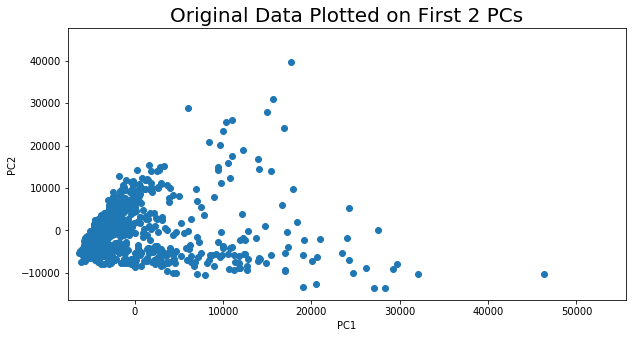

In [49]:
# plot original data on first 2 PCs

xmin = pca_2_df['PC1'].min()
xmax = pca_2_df['PC1'].max()
ymin = pca_2_df['PC2'].min()
ymax = pca_2_df['PC2'].max()

SCALE = 1.2
plt.figure(figsize= (10,5))
plt.xlim(xmin * SCALE, xmax * SCALE)
plt.ylim(ymin * SCALE, ymax * SCALE)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Original Data Plotted on First 2 PCs', size = 20)

plt.scatter(x = pca_2_df['PC1'], y = pca_2_df['PC2'])
plt.show()

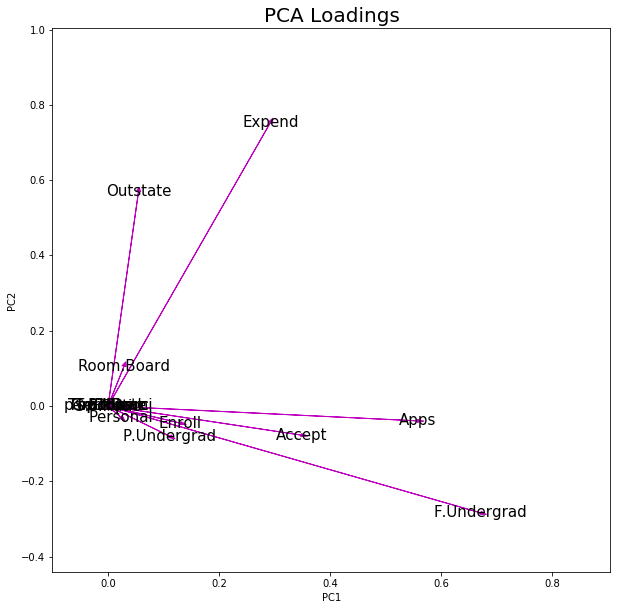

In [50]:
# Plot the loadings 

xmin = pca_comp_2_df['PC1'].min()
xmax = pca_comp_2_df['PC1'].max()
ymin = pca_comp_2_df['PC2'].min()
ymax = pca_comp_2_df['PC2'].max()


SCALE = 1.2
PAD = 0.1

plt.figure(figsize= (10,10))
plt.xlim(xmin * SCALE - PAD, xmax * SCALE + PAD)
plt.ylim(ymin * SCALE - PAD, ymax * SCALE + PAD)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Loadings', size = 20)

for i in range(len(df.columns)):
    x = pca_comp_2_df.iloc[i, 0]
    y = pca_comp_2_df.iloc[i, 1]
    plt.arrow(0, 0, x, y, color='m',
              width=0.0001, head_width=0.008)
    plt.text(x, y, pca_comp_2_df.index[i], color='k', ha='center', va='center', fontsize=15)

plt.show()


#### Variables that sppear strongly correlated on the first principal component:  
* `Apps` - Number of applications received  
* `Accept` - Number of applications accepted  
* `Enroll` - Number of new students enrolled  
* `F.Undergrad` - Number of fulltime undergraduates  
* `P.Undergrad` - Number of parttime undergraduates  


#### Variables that sppear strongly correlated on the second principal component:  
* `Room.Board` - Room and board costs.
* `Expend` - Instructional expenditure per student.
* `Outstate` - Out-of-state tuition.  

It seems that the first principle component is related to admission and the second is related to cost.






### 2. Calculate the **cumulative proportion of variance explained** by all the principal components. 
Approximately how much of the variance in `College` is explained by the first two principal components?


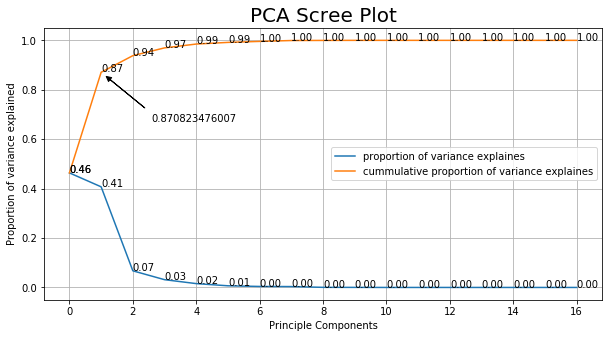

In [51]:
plt.figure(figsize= (10,5))
plt.xlabel('Principle Components')
plt.ylabel('Proportion of variance explained')
plt.title('PCA Scree Plot',  size = 20)

# plot the explained variance ratio
plt.plot(pca.explained_variance_ratio_, label='proportion of variance explaines')
for a,b in enumerate(pca.explained_variance_ratio_): 
    plt.text(a, b, '%.2f' % b)
    
# plot the cummulative proportion of variance explained
cum_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cum_ratio, label='cummulative proportion of variance explaines')
for a,b in enumerate(cum_ratio): 
    plt.text(a, b, '%.2f' % b)
plt.annotate(cum_ratio[1], xy = (1, cum_ratio[1]), xytext = (2.6, cum_ratio[1]-0.2),
            arrowprops = dict(color = 'k', shrink = 0.1, width = 0.01, headlength = 5, headwidth = 5))

plt.legend(loc = 5)
plt.grid()
plt.show()

Approximately 87% of the variance is explained by the first two principle components.

## Clustering States
### 1. Perform PCA on the dataset and plot the observations on the first and second principal components.

In [52]:
# take a look at the data
url = "https://github.com/UC-MACSS/persp-analysis/blob/master/assignments/unsupervised-learning/data/USArrests.csv?raw=True"
df = pd.read_csv(url, index_col = 0)
df.head()

,Murder,Assault,UrbanPop,Rape
State,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [53]:
# perform PCA 
pca = PCA()
pca_data = pca.fit_transform(df)
pca_2 = pca_data[:, :2]
pca_2_df = pd.DataFrame(pca_2,index = df.index, columns = ['PC1', 'PC2', ])
pca_2_df.head()

,PC1,PC2
State,,
Alabama,64.802164,11.448007
Alaska,92.827450,17.982943
Arizona,124.068216,-8.830403
Arkansas,18.340035,16.703911
California,107.422953,-22.520070


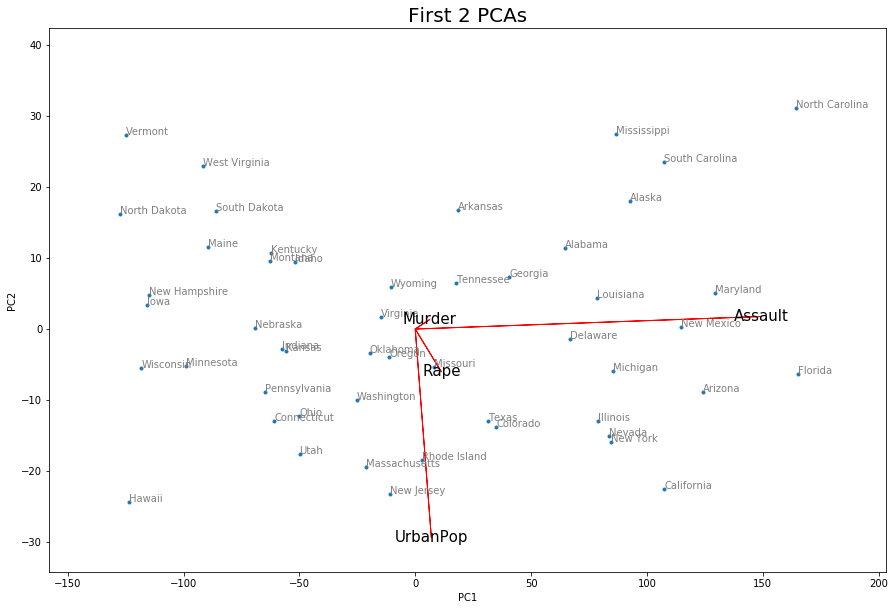

In [54]:
# plot PCA
xmin = pca_2_df['PC1'].min()
xmax = pca_2_df['PC1'].max()
ymin = pca_2_df['PC2'].min()
ymax = pca_2_df['PC2'].max()

SCALE = 1.2
PAD = 5

plt.figure(figsize= (15,10))
plt.xlim(xmin * SCALE - PAD, xmax * SCALE + PAD)
plt.ylim(ymin * SCALE - PAD, ymax * SCALE + PAD)

plt.scatter(x = pca_2_df['PC1'], y = pca_2_df['PC2'], marker = '.')
for i in pca_2_df.index:
    plt.annotate(i, (pca_2_df.loc[i]['PC1'], pca_2_df.loc[i]['PC2']), color = 'grey')

pca_comp_2_df = pd.DataFrame(pca.components_.T[:, :2], index = df.columns, columns = ['PC1', 'PC2'])
for i in range(len(df.columns)):
    x = pca_comp_2_df.iloc[i, 0]
    y = pca_comp_2_df.iloc[i, 1]
    plt.arrow(0, 0, x*150, y*30, color='r',
              width=0.0001, head_width=0.008)
    plt.text(x*150, y*30, pca_comp_2_df.index[i], color='k', ha='center', va='center', fontsize=15)
    
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('First 2 PCAs', size = 20)
    
plt.show()

In [55]:
# this block of code performs kmeans and draw plot according to the parameters passed to it

from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as hr

def perform_kmeans(df, n, ax, title, xlabel, ylabel, text_size, marker_size):
    km = KMeans(n_clusters=n).fit(df)
    labels = km.labels_
    clusters = []
    colors = ['c','m','y','k']
    for i in range(n):
        clusters.append([])
        clusters[i] = pd.DataFrame([pca_2_df.iloc[j] for j in range(pca_2_df.shape[0]) if labels[j] == i])
        ax.scatter(x = clusters[i]['PC1'], y = clusters[i]['PC2'], 
                   marker = '.', c = colors[i], label = "Cluster "+str(i+1), s = marker_size)
        for j in clusters[i].index:
            ax.annotate(j, (clusters[i].loc[j]['PC1'], clusters[i].loc[j]['PC2']), 
                        color = colors[i], 
                        ha = 'center',
                        size = text_size)
            
    centers = km.cluster_centers_
    pca_c = pca.fit_transform(centers)
    ax.scatter(x = pca_c[:, 0], y = pca_c[:, 1], marker = 'x', c = 'r', label = 'Centers', s = marker_size)
    ax.set_title(title, size = 20)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.margins(x = 0.1, y =0.1)
    ax.legend()


#### 2. Perform $K$-means clustering with $K=2$. Plot the observations on the first and second principal components and color-code each state based on their cluster membership. Describe your results.
#### 3. Perform $K$-means clustering with $K=4$. Plot the observations on the first and second principal components and color-code each state based on their cluster membership. Describe your results.



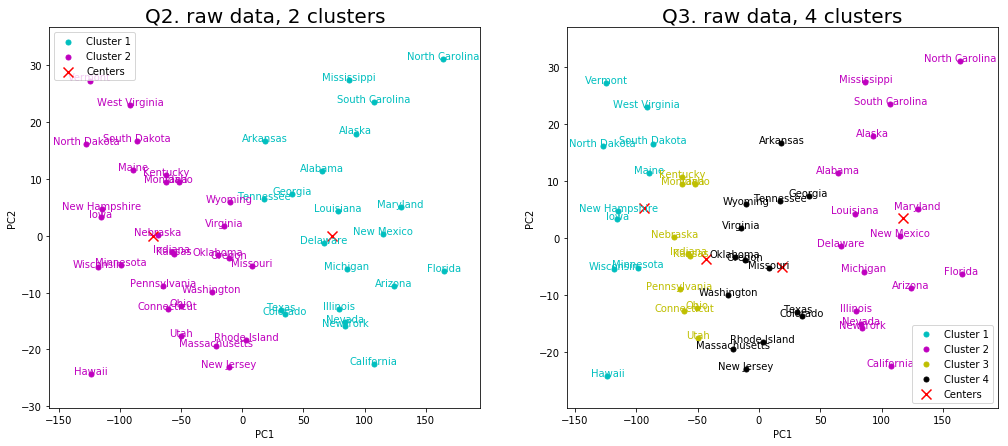

In [56]:
figure, axes = plt.subplots(1, 2, figsize = (17,7))
perform_kmeans(df, 2, axes[0], "Q2. raw data, 2 clusters", 'PC1', 'PC2', 10, 100)
perform_kmeans(df, 4, axes[1], "Q3. raw data, 4 clusters", 'PC1', 'PC2', 10, 100)
plt.show()

The plots above show the membership of the states to clusters when the number of clusters is 2 or 4 respectively. 
We can see that the number of clusters do affect whether two points belong to the same cluster.
Also, visually, the clusters are mainly horizontal, so members in the same cluster have more similar PC1 scores than PC2 values. This means that they are mainly grouped according to their PC1 related characteristics - crimes. 

#### 4. Perform $K$-means clustering with $K=3$. Plot the observations on the first and second principal components and color-code each state based on their cluster membership. Describe your results.

#### 5. Perform $K$-means clustering with $K=3$ on the first two principal components score vectors, rather than the raw data. Describe your results and compare them to the clustering results with $K=3$ based on the raw data.


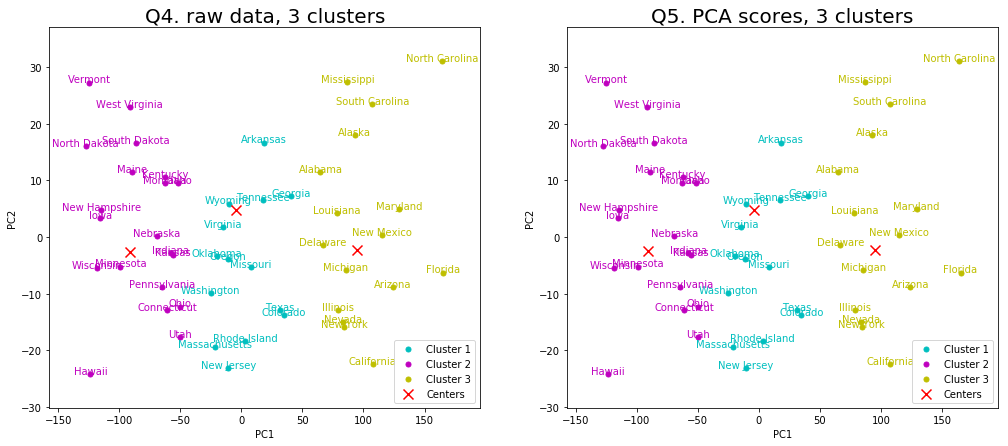

In [57]:
figure, axes = plt.subplots(1, 2, figsize = (17,7))
perform_kmeans(df, 3, axes[0], "Q4. raw data, 3 clusters", 'PC1', 'PC2', 10, 100)
perform_kmeans(pca_2_df, 3, axes[1], "Q5. PCA scores, 3 clusters", 'PC1', 'PC2', 10, 100)
plt.show()

Similar as the questions before, the number of clusters do affect cluster membership and the states are mainly grouped according to similar PC1 scores.  

We can also see that  the results are the same whether we perform KMeans on the raw data or on PCA scores, which means that the PCA captured the variations in the raw data pretty well. 

#### 6. Using hierarchical clustering with complete linkage and Euclidean distance, cluster the states.
#### 7. Cut the dendrogram at a height that results in three distinct clusters. Which states belong to which clusters?

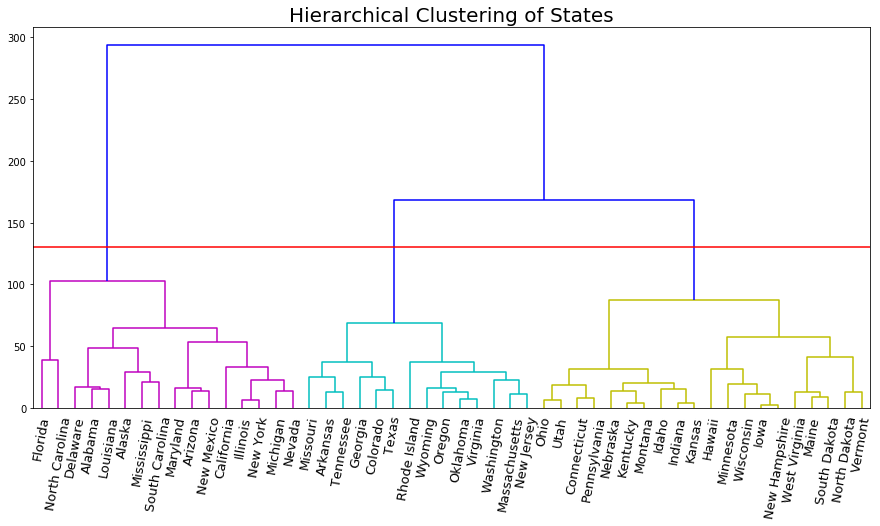

In [58]:
def draw_dendro(df, ct):
    l = hr.linkage(df, method='complete', metric='euclidean')
    plt.figure(figsize = (15, 7))
    dn = hr.dendrogram(l, labels = df.index, color_threshold =ct, leaf_font_size = 13, leaf_rotation = 80)
    hr.set_link_color_palette(['m', 'c', 'y', 'k'])
    plt.title('Hierarchical Clustering of States', size = 20)
    plt.axhline(130, color='r')
    plt.show()
    
draw_dendro(df, 110)

The states' membership in the clusters are shown in different colors. 

#### 8. Hierarchically cluster the states using complete linkage and Euclidean distance, after scaling the variables to have standard deviation $1$. What effect does scaling the variables have on the hierarchical clustering obtained?

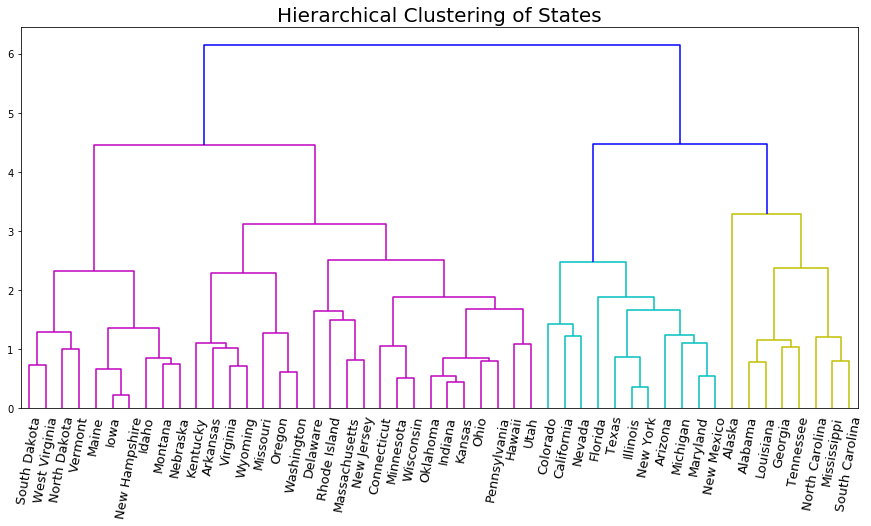

In [59]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler(with_std = 1)
scaled = scalar.fit_transform(df)
df_scaled = pd.DataFrame(scaled, index = df.index, columns = df.columns)
draw_dendro(df_scaled, 4.45)

The states' membership in the clusters are shown in different colors.  

We can see that scaling does affect which state belongs to which group. One reason is that by scaling all the variables to have standard deviation 1, we are giving them more equal weights in determining the clusters of the observations. If we don't scale, it's very likely that some variables with large values, `Assault` in this case, will dominate the how the clusters are determined since it's magnitude is far greater than the other variables and will be affecting the distance between observations more than the other variables. Therefore, it's important to scale before performing clustering.  